# News topic modelling

The goal of this notebook is to explore a kagglw news dataset and discover its topics asserting these topics have sense from a human prespective

## Data exploration

In [79]:
import pandas as pd
import numpy as np

In [7]:
data_filename = "articles1.csv"
raw_data = pd.read_csv(data_filename)
raw_data

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


## Data preparation

In [31]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
sampling_num_documents = 1000
raw_data_subset = raw_data.sample(n=sampling_num_documents).reset_index()
raw_data_subset.shape

(1000, 11)

In [33]:
data = raw_data_subset[["title","content"]]
data.head()

,title,content
0,Former Obama aide: Trump is a ’psychopath’,Washington (CNN) Donald Trump is a ”psychopath...
1,Whitney Houston’s daughter hospitalized,"Atlanta (CNN) Whitney Houston’s daughter, Bobb..."
2,John Lewis’ constituents are fighting back aft...,’ ’ ’ Constituents of the icon and Georgi...
3,Donald Trump Tells NRA Hillary Clinton’s Guard...,Donald Trump went on the battle path against H...
4,NBC’s Lester Holt Interrupts Trump Nine Times ...,NBCNews. com on Thursday posted a two minute a...


In [34]:
def tokenize(text):
    """
    English tokenitzation function
    Applied filters:
    * Min length words filter
    * Lower case transformation
    * Literals filter (no numbers either punctuation allows)
    * Stem filter (PorterStemmer to remove morphological affixes)
    * Stop words filter
    @TODO - lemmaritzxation
    @PoS Tagging
    """
    cachedStopWords = stopwords.words("english")
    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text));
    words = [word for word in words
                  if word not in cachedStopWords]
    tokens =(list(map(lambda token: PorterStemmer().stem(token),
                  words)));
    p = re.compile('[a-zA-Z]+');
    filtered_tokens = list(filter(lambda token: p.match(token) and 
                                  len(token)>=min_length, tokens));
    return filtered_tokens

In [35]:
data_list = data["content"].values
len(data_list)

1000

In [36]:
# Vectorizing raw documents. Applying also tokenitzation

#@TODO - Investigate lemmalitzation, and nlp PoS tagging
vectorizer = CountVectorizer(tokenizer=tokenize,min_df=10,max_df=0.8)
vectorized_documents = vectorizer.fit_transform(data_list)
print(vectorized_documents.shape)

(1000, 3495)


In [134]:
vectorized_documents.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [144]:
# Materialize the sparse data
data_dense = vectorized_documents.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/float(data_dense.size))*100, "%")

Sparsicity:  5.1245779685264665 %


In [73]:
# Frequencies matrix vocabulary
vocabulary = list(vectorizer.vocabulary_.keys())
print(len(vocabulary))
vocabulary

3495


[u'four',
 u'disturb',
 u'wednesday',
 u'lgbt',
 u'china',
 u'controversi',
 u'golden',
 u'dna',
 u'dnc',
 u'music',
 u'strike',
 u'notic',
 u'caution',
 u'want',
 u'travel',
 u'wrong',
 u'fit',
 u'fix',
 u'easier',
 u'slate',
 u'interrupt',
 u'scholar',
 u'accommod',
 u'healthcar',
 u'commiss',
 u'drove',
 u'silent',
 u'silicon',
 u'caught',
 u'prosecut',
 u'master',
 u'legislatur',
 u'task',
 u'technic',
 u'tree',
 u'friend',
 u'dozen',
 u'kremlin',
 u'decri',
 u'mouth',
 u'singer',
 u'camp',
 u'tech',
 u'came',
 u'openli',
 u'restaur',
 u'rick',
 u'rich',
 u'rice',
 u'specialist',
 u'figur',
 u'inabl',
 u'extend',
 u'optimist',
 u'extens',
 u'extent',
 u'toler',
 u'debt',
 u'disdain',
 u'unemploy',
 u'logic',
 u'countri',
 u'compromis',
 u'assur',
 u'assum',
 u'subsidi',
 u'union',
 u'much',
 u'regul',
 u'worker',
 u'dave',
 u'spin',
 u'davi',
 u'employ',
 u'split',
 u'european',
 u'veteran',
 u'capitol',
 u'seen',
 u'previous',
 u'satellit',
 u'endur',
 u'hat',
 u'shadow',
 u'speci

## Running topi modelling
Run LDA using gridsearch in order to find an optimal number of topics

In [39]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [40]:
num_categories = 90

# Define Search Param
search_params = {'n_components': [i for i in xrange(5,num_categories, 5)], 'learning_decay': [.5, .7, .9]}
search_params

{'learning_decay': [0.5, 0.7, 0.9],
 'n_components': [5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85]}

In [41]:
# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(vectorized_documents)

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The d

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The d

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The d

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The d

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The d

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The d

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_decay': [0.5, 0.7, 0.9], 'n_components': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Data topic modelling results & visualitzation
Best gridsearch combination of hyperparameters results & visualitzation

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn

In [44]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(vectorized_documents))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -785228.2616002605
Model Perplexity:  1616.022206540581


/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


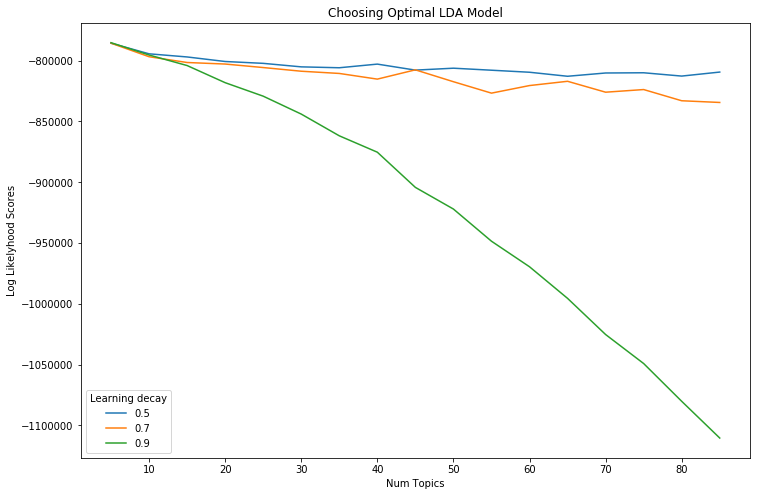

In [46]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [i for i in xrange(5,num_categories,5)]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [301]:
#PyLDAvis visualitzation
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(best_lda_model, vectorized_documents, vectorizer, mds='mmds')

/Users/mcardus/miniconda3/envs/python2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      36.467097        1       1  0.056909  0.010888
1      28.874104        1       2  0.043242  0.101653
2      22.527834        1       3 -0.082516 -0.030717
0       9.560570        1       4 -0.081063  0.104147
3       2.570395        1       5  0.063428 -0.185971, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
2031  Default  1881.000000         mr.  1881.000000  30.0000  30.0000
2954  Default  1549.000000       state  1549.000000  29.0000  29.0000
2691  Default  4142.000000        said  4142.000000  28.0000  28.0000
3241  Default  3064.000000       trump  3064.000000  27.0000  27.0000
2542  Default   321.000000      refuge   321.000000  26.0000  26.0000
2271  Default   426.000000     percent   426.000000  25.0000  25.0000
3477  Default  1361.000000        year  1361.000000  24.0000  24.0000
2585  Default  1114.000000      report  1114.000000  23.0000  23.0000
1427  Default   285.000000      health   285.000000  22.0000  22.0000
2455  Default   437.000000      public   437.000000  21.0000  21.0000
473   Default   507.000000        case   507.000000  20.0000  20.0000
2034  Default   392.000000         ms.   392.000000  19.0000  19.0000
575   Default  1250.000000     clinton  1250.000000  18.0000  18.0000
2502  Default   214.000000        rate   214.000000  17.0000  17.0000
2451  Default   263.000000      provid   263.000000  16.0000  16.0000
1221  Default   779.000000       first   779.000000  15.0000  15.0000
843   Default   344.000000      depart   344.000000  14.0000  14.0000
2718  Default   299.000000      school   299.000000  13.0000  13.0000
33    Default   204.000000       activ   204.000000  12.0000  12.0000
2124  Default   356.000000      number   356.000000  11.0000  11.0000
2010  Default   426.000000       month   426.000000  10.0000  10.0000
1575  Default   322.000000      inform   322.000000   9.0000   9.0000
1352  Default   603.000000      govern   603.000000   8.0000   8.0000
1625  Default   466.000000    investig   466.000000   7.0000   7.0000
733   Default   766.000000     countri   766.000000   6.0000   6.0000
2151  Default   664.000000      offici   664.000000   5.0000   5.0000
731   Default   175.000000      counti   175.000000   4.0000   4.0000
2269  Default   155.000000         per   155.000000   3.0000   3.0000
2589  Default   736.000000  republican   736.000000   2.0000   2.0000
3452  Default   506.000000       women   506.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
2644   Topic5    34.831046         rio    74.133002   2.9058  -5.4269
214    Topic5    31.440812      athlet    71.841035   2.8348  -5.5293
389    Topic5    26.261778      brazil    60.638173   2.8243  -5.7093
1961   Topic5    17.844151    michigan    41.205429   2.8242  -6.0957
944    Topic5    53.622095         dr.   125.258763   2.8127  -4.9954
1580   Topic5     8.210587      inject    19.508893   2.7957  -6.8720
1010   Topic5     7.361741        elig    17.932856   2.7708  -6.9811
2502   Topic5    79.218807        rate   214.865413   2.6633  -4.6052
1973   Topic5    15.125954      miller    41.410889   2.6540  -6.2610
339    Topic5     4.195476        bite    11.611596   2.6431  -7.5434
86     Topic5     6.568971     airplan    18.325617   2.6352  -7.0950
927    Topic5    35.220376      doctor   102.571321   2.5922  -5.4158
2728   Topic5    17.642804      screen    53.365433   2.5543  -6.1071
731    Topic5    51.830096      counti   175.568811   2.4411  -5.0294
2269   Topic5    45.736838         per   155.463539   2.4376  -5.1545
1938   Topic5    40.063114       medic   133.724049   2.4558  -5.2869
2271   Topic5    97.398549     percent   426.069638   2.1853  -4.3986
2455   Topic5    83.614591      public   437.611393   2.0060  -4.5512
33     To

In [300]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(vectorized_documents)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(data.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0,0.99,0,0.01,0,1
Doc1,0.36,0.46,0.13,0.01,0.04,1
Doc2,0.14,0.65,0.13,0.08,0,1
Doc3,0.26,0.71,0.03,0,0,1
Doc4,0,0.36,0.63,0,0,2
Doc5,0.12,0.3,0,0,0.57,4
Doc6,0.15,0,0.1,0,0.75,4
Doc7,0.03,0,0.97,0,0,2
Doc8,0,0.44,0,0,0.56,4
Doc9,0,0.99,0,0,0,1


## Topic summaritzation

In [226]:
from nltk import FreqDist

In [303]:
# Obtaining summaritzation based in headlines
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(vectorized_documents)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(data.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
common_tokens = []
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic["headline"] = data["title"].values
df_document_topic["content"] = data["content"].values
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic,headline,content
Doc0,0.00,0.99,0.00,0.01,0.00,1,Former Obama aide: Trump is a ’psychopath’,Washington (CNN) Donald Trump is a ”psychopath...
Doc1,0.36,0.46,0.13,0.01,0.04,1,Whitney Houston’s daughter hospitalized,"Atlanta (CNN) Whitney Houston’s daughter, Bobb..."
Doc2,0.14,0.65,0.13,0.08,0.00,1,John Lewis’ constituents are fighting back aft...,’ ’ ’ Constituents of the icon and Georgi...
Doc3,0.26,0.71,0.03,0.00,0.00,1,Donald Trump Tells NRA Hillary Clinton’s Guard...,Donald Trump went on the battle path against H...
Doc4,0.00,0.36,0.63,0.00,0.00,2,NBC’s Lester Holt Interrupts Trump Nine Times ...,NBCNews. com on Thursday posted a two minute a...
Doc5,0.12,0.30,0.00,0.00,0.57,4,"Golden Globes Recap: Ricky Gervais Delivers, ’...",Ricky Gervais stole the show as host of the 73...
Doc6,0.15,0.00,0.10,0.00,0.75,4,Cal Poly State President Defends MILO’s Right ...,Despite protests from progressive student acti...
Doc7,0.03,0.00,0.97,0.00,0.00,2,Alleged Duterte hitman: ’Our job was just to k...,(CNN) Philippine President Rodrigo Duterte’s ...
Doc8,0.00,0.44,0.00,0.00,0.56,4,Janelle Monáe Calls on Women to Withhold Sex U...,Janelle Monáe believes the only way men will...
Doc9,0.00,0.99,0.00,0.00,0.00,1,Club for Growth Plans Anti-Trump Ad in Wiscons...,"The Club for Growth, which has long opposed GO..."


In [302]:
# Obtaining summaritzation based in headlines
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(vectorized_documents)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(data.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
common_tokens = []
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic["headline"] = data["title"].values
df_document_topic["content"] = data["content"].values
concatenated_headlines = df_document_topic.groupby("dominant_topic")["headline"].apply(lambda x: " ".join(x)).to_frame()
concatenated_headlines

,headline
dominant_topic,
0,Emperor Akihito of Japan Plans to Abdicate Thr...
1,Former Obama aide: Trump is a ’psychopath’ Whi...
2,NBC’s Lester Holt Interrupts Trump Nine Times ...
3,State of Michigan Hides Refugee Health Data - ...
4,"Golden Globes Recap: Ricky Gervais Delivers, ’..."


In [304]:


for topic_id, headlines in enumerate(concatenated_headlines["headline"].values):
    common_tokens.append([token[0] for token in FreqDist(tokenize(headlines.decode('utf-8'))).most_common(20)]) 

df_topic_keywords = pd.DataFrame(common_tokens)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,new,time,york,trump,breitbart,die,year,clinton,john,say,obama,look,actor,minist,gun,israel,penc,hillari,face,life
Topic 1,breitbart,trump,clinton,new,hillari,time,donald,york,republican,cruz,gop,campaign,poll,attack,democrat,gun,vote,obama,bill,elect
Topic 2,breitbart,trump,time,new,york,offici,russia,clinton,report,russian,attack,state,obama,kill,say,take,fbi,court,man,u.s.
Topic 3,breitbart,zika,offici,miami,refuge,open,olymp,case,near,coach,less,yellow,bring,rough,texa,women,accus,labor,spread,obama
Topic 4,new,breitbart,york,time,trump,say,migrant,facebook,state,like,milo,korea,fire,wall,north,polic,war,year,get,use


In [305]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorized_documents, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)

# Defining baseline
baseline_top_terms = topic_keywords

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,mr.,said,ms.,trump,presid,would,year,also,one,polit,time,kain,first,new,famili,penc,campaign,call,state,mrs.
Topic 1,trump,say,clinton,said,like,republican,one,peopl,campaign,get,would,time,vote,donald,democrat,new,think,state,voter,twitter
Topic 2,said,trump,state,presid,report,offici,investig,polic,hous,govern,offic,would,secur,time,attack,russian,nation,peopl,year,obama
Topic 3,refuge,health,state,percent,public,rate,zika,year,case,diseas,resettl,report,olymp,dr.,infect,counti,activ,per,provid,idaho
Topic 4,said,one,peopl,year,like,would,also,new,time,work,make,compani,could,state,use,countri,women,citi,mani,american


## Data prediction

In [288]:
predict_data = ["The plight of hundreds of thousands of Rohingya people is said to be the world's fastest growing refugee crisis. Risking death by sea or on foot, nearly 700,000 have fled the destruction of their homes and persecution in the northern Rakhine province of Myanmar (Burma) for neighbouring Bangladesh since August 2017. The United Nations described the military offensive in Rakhine, which provoked the exodus, as a 'textbook example of ethnic cleansing'. Myanmar's military says it is fighting Rohingya militants and denies targeting civilians.", "Despite White House adviser Kellyanne Conway's claim that nobody in the Trump administration is still talking about Hillary Clinton, President Trump has tweeted about his former rival no fewer than 75 times since being inaugurated. There is no shortage of unanswered questions about Trump after one year in the White House. But even alongside debate about his mental fitness and worry over his foreign financial entanglements, in some ways the American president's obsession with Clinton is the most concerning."]
predict_data

["The plight of hundreds of thousands of Rohingya people is said to be the world's fastest growing refugee crisis. Risking death by sea or on foot, nearly 700,000 have fled the destruction of their homes and persecution in the northern Rakhine province of Myanmar (Burma) for neighbouring Bangladesh since August 2017. The United Nations described the military offensive in Rakhine, which provoked the exodus, as a 'textbook example of ethnic cleansing'. Myanmar's military says it is fighting Rohingya militants and denies targeting civilians.",
 "Despite White House adviser Kellyanne Conway's claim that nobody in the Trump administration is still talking about Hillary Clinton, President Trump has tweeted about his former rival no fewer than 75 times since being inaugurated. There is no shortage of unanswered questions about Trump after one year in the White House. But even alongside debate about his mental fitness and worry over his foreign financial entanglements, in some ways the America

In [298]:
predict_vectors = vectorizer.transform(predict_data)
predict_vectors_dense = predict_vectors.todense()
print("Sparsicity: ", ((predict_vectors_dense > 0).sum()/float(predict_vectors_dense.size))*100, "%")

Sparsicity:  1.0157367668097281 %


In [299]:
# Create Document - Topic Matrix
lda_output_predict = best_lda_model.transform(predict_vectors)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(predict_data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_predict, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.01,0.01,0.3,0.05,0.64,4
Doc1,0,0.6,0.39,0,0,1


In [297]:
lda_output_predict

array([[0.00584278, 0.00579862, 0.29725935, 0.04949993, 0.64159932],
       [0.0045556 , 0.59679783, 0.38939439, 0.00462492, 0.00462726]])